In [2]:
from __future__ import division
import time

import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('/Users/a781424259/Desktop/Bussiness Analytics/Final Project/stockx_machine_learning_analysis-master/data/data_prep_wo_trend.csv')

In [ ]:
df1 = df.drop(['Unnamed: 0','Colorful'],axis=1)
# df1 = df1[:100]

In [ ]:
# df = df.rename(columns={"Unnamed: 0": "index"})
# Train-Test Splitting
x = df1.drop(["Pct_change",'Sale Price'], axis=1)
y = df1["Pct_change"]

In [ ]:
np.random.seed(1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [ ]:
from sklearn import preprocessing
x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)

In [ ]:
linearsvr = LinearSVR()

In [ ]:
# svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1, cache_size=7000), cv=5,
#                    param_grid={"C": [10, 1e0, 1e1, 1e2, 1e3],
#                                "gamma": np.logspace(-2, 2, 5)})

In [ ]:
svr = GridSearchCV(LinearSVR(tol=0.01), cv=5,
                   param_grid={"C": [0.01,0.1,1e0, 1e1]})

In [ ]:
svr.fit(x_train, y_train)

In [ ]:
svr.best_params_

In [ ]:
svr.best_estimator_

In [ ]:
y_pred = svr.predict(x_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import  r2_score,mean_absolute_error,mean_squared_log_error,median_absolute_error,explained_variance_score

print('R²: %.2f' % r2_score(y_test, y_pred))
# print("mean_squared_log_error: %.2f" % mean_squared_log_error(y_test, y_pred))
print("mean_absolute_error: %.2f" % mean_absolute_error(y_test, y_pred))
print("median_absolute_error: %.2f" % median_absolute_error(y_test, y_pred))
print("explained_variance_score: %.2f" % explained_variance_score(y_test, y_pred))

#Random Forest

In [3]:
df = pd.read_csv('/Users/a781424259/Desktop/Bussiness Analytics/Final Project/stockx_machine_learning_analysis-master/data/data_prep_wo_trend.csv')
df1 = df.drop(['Unnamed: 0','Colorful'],axis=1)
x = df1.drop(["Pct_change",'Sale Price'], axis=1)
y = df1["Pct_change"]
np.random.seed(1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [4]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69969 entries, 94389 to 98539
Data columns (total 29 columns):
Days Since Release    69969 non-null float64
yeezy                 69969 non-null int64
airjordan             69969 non-null int64
airforce              69969 non-null int64
airmax90              69969 non-null int64
airmax97              69969 non-null int64
presto                69969 non-null int64
vapormax              69969 non-null int64
blazer                69969 non-null int64
zoom                  69969 non-null int64
react                 69969 non-null int64
California            69969 non-null int64
New York              69969 non-null int64
Oregon                69969 non-null int64
Florida               69969 non-null int64
Texas                 69969 non-null int64
Other States          69969 non-null int64
Black                 69969 non-null float64
White                 69969 non-null float64
Grey                  69969 non-null float64
Red                

In [5]:
from sklearn.ensemble import RandomForestRegressor
sk_model=RandomForestRegressor(n_estimators=100, max_depth=50)
sk_model.fit(x_train, y_train)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [6]:
param_grid = {
    'max_depth':[2,4,5],
    'max_leaf_nodes':[10,100,500],  
}

model = RandomForestRegressor(n_estimators=100, max_depth=10)

clf = GridSearchCV(model, cv=5,
                   param_grid=param_grid)
clf.fit(x_train, y_train) 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=10,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [7]:
clf.best_params_
sk_model=clf.best_estimator_

In [8]:
sk_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=500,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [9]:
y_pred2 = sk_model.predict(x_test)
# y_pred2[y_pred2==np.nan]
# y_test[y_test==np.nan]

In [10]:
from sklearn import metrics
from sklearn.metrics import  r2_score,mean_absolute_error,mean_squared_log_error,median_absolute_error,explained_variance_score

print('R²: %.2f' % r2_score(y_test, y_pred2))
# print("mean_squared_log_error: %.2f" % mean_squared_log_error(y_test, y_pred2))
print("mean_absolute_error: %.2f" % mean_absolute_error(y_test, y_pred2))
print("median_absolute_error: %.2f" % median_absolute_error(y_test, y_pred2))
print("explained_variance_score: %.2f" % explained_variance_score(y_test, y_pred2))

R²: 0.87
mean_absolute_error: 0.28
median_absolute_error: 0.12
explained_variance_score: 0.87


In [11]:
index=sk_model.feature_importances_.argsort()[::-1][0:15]
index_imp=sk_model.feature_importances_[index]
index_name=x.columns[index].tolist()
feature_importance=list(zip(index_name,index_imp))
feature_importance

[('Number of Sales', 0.6709853430420372),
 ('zoom', 0.1008524258329864),
 ('airjordan', 0.09251103602505416),
 ('Days Since Release', 0.05013460042345882),
 ('vapormax', 0.03058025440657385),
 ('presto', 0.024049479410682948),
 ('airforce', 0.014608708041116462),
 ('Blue', 0.008363934125194965),
 ('Neo', 0.0048801674830885),
 ('White', 0.0013454761103153657),
 ('Grey', 0.001092436610572701),
 ('Black', 0.0004105883912228963),
 ('size_freq', 0.000149790702656682),
 ('Other States', 3.3958174335243984e-05),
 ('New York', 1.8012207039122389e-06)]

<BarContainer object of 15 artists>

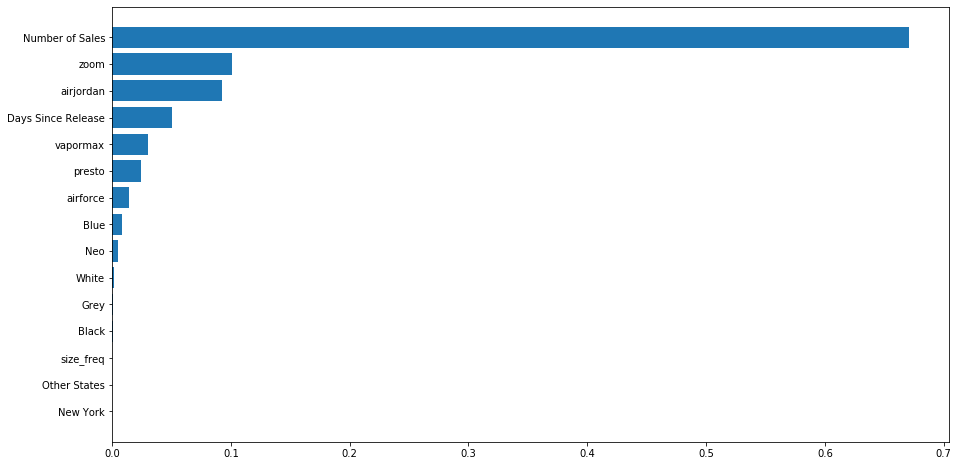

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(15,8))
ind = [k for k in range(15)]
plt.barh(ind, index_imp[::-1], tick_label = index_name[::-1])